In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False

In [26]:
hmm = pd.read_csv("HMM_result.csv")
sp = pd.read_csv("SP_result.csv")
kp = pd.read_csv("KP_50_3_result.csv")
kp_dynamic = pd.read_csv("kp_dynamic_result.csv")
kp_dynamic_fix = pd.read_csv("kp_dynamic_result_fix.csv")
kp_dynamic_fix_acc20 = pd.read_csv("kp_dynamic_result_fix_ACC20.csv")

hmm[0:5]

,id,ori_distance,distance,difference,time
0,0,4256.456210,4555.712343,0.070306,2.218142
1,1,6513.073185,6511.810541,0.000194,2.108568
2,2,19088.841520,20026.385480,0.049115,2.232921
3,3,10849.122300,143742.527400,12.249231,2.250954
4,4,2380.363361,5896.543417,1.477161,2.062259


In [27]:
diffData = {
    "HMM":[hmm[hmm['difference']<0.05].shape[0],hmm[hmm['difference']<0.1].shape[0],hmm[hmm['difference']<0.2].shape[0]],
    "SP":[sp[sp['difference']<0.05].shape[0],sp[sp['difference']<0.1].shape[0],sp[sp['difference']<0.2].shape[0]],
    "KP":[kp[kp['difference']<0.05].shape[0],kp[kp['difference']<0.1].shape[0],kp[kp['difference']<0.2].shape[0]],
    "KP_dynamic":[kp_dynamic[kp_dynamic['difference']<0.05].shape[0],kp_dynamic[kp_dynamic['difference']<0.1].shape[0],kp_dynamic[kp_dynamic['difference']<0.2].shape[0]],
    "KP_dynamic_fix":[kp_dynamic_fix[kp_dynamic_fix['difference']<0.05].shape[0],kp_dynamic_fix[kp_dynamic_fix['difference']<0.1].shape[0],kp_dynamic_fix[kp_dynamic_fix['difference']<0.2].shape[0]],
    "KP_dynamic_fix_acc20":[kp_dynamic_fix_acc20[kp_dynamic_fix_acc20['difference']<0.05].shape[0],kp_dynamic_fix_acc20[kp_dynamic_fix_acc20['difference']<0.1].shape[0],kp_dynamic_fix_acc20[kp_dynamic_fix_acc20['difference']<0.2].shape[0]]
}
index = ["<0.05", "<0.10","<0.20"]
diffDF = pd.DataFrame(diffData, index=index)
diffDF

,HMM,SP,KP_dynamic_fix_acc50,KP_dynamic_fix_acc20,rl_acc20,cuthead
<0.05,414,898,1508,1514,1488,1448
<0.10,600,1373,2099,2052,2089,2091
<0.20,834,1861,2488,2439,2497,2498


In [28]:
hmm[hmm['difference']<0.05].shape[0],hmm[hmm['difference']<0.1].shape[0] #hmm误差小于0.05 和 小于0.1的数量

(414, 600)

In [29]:
sp[sp['difference']<0.05].shape[0],sp[sp['difference']<0.1].shape[0] #sp误差小于0.05 和 小于0.1的数量

(898, 1373)

In [29]:
kp[kp['difference']<0.05].shape[0],kp[kp['difference']<0.1].shape[0] #kp误差小于0.05 和 小于0.1的数量

In [30]:
("hmm时间均值、最大值:",(hmm['time']-2).mean(),(hmm['time']-2).max()),("sp时间均值、最大值:",(sp['time']).mean(),(sp['time']).max()) #hmm和sp的平均时间

(('hmm时间均值、最大值:', 0.8270187097085184, 8.82725525),
 ('sp时间均值、最大值:', 1.1277688424685186, 46.64920759))

In [30]:
("kp时间均值、最大值:",(kp['time']).mean(),(kp['time']).max())

(array([1373.,  488.,  276.,  181.,  116.,   88.,   53.,   42.,   19.,
          17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

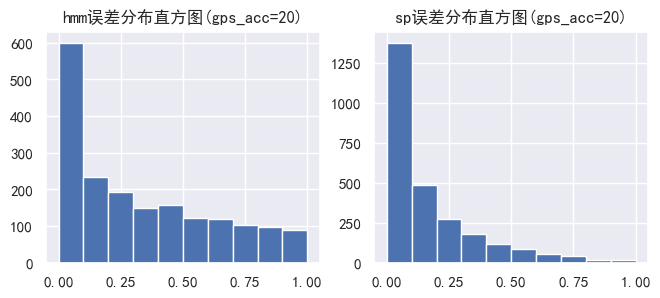

In [31]:
f = plt.figure(figsize=(12,3))                            #确定画布
sub1 = f.add_subplot(1,3,1)
sub1.set_title("hmm误差分布直方图(gps_acc=20)")
sub1.hist(hmm['difference'],range=(0,1))
sub2 = f.add_subplot(1,3,2)
sub2.set_title("sp误差分布直方图(gps_acc=20)")

sub2.hist(sp['difference'],range=(0,1))
sub3 = f.add_subplot(1,3,3)
sub3.set_title("     kp误差分布直方图(gps_acc=20,距离阈值=50,连续点=3)")
sub3.hist(kp['difference'],range=(0,1));

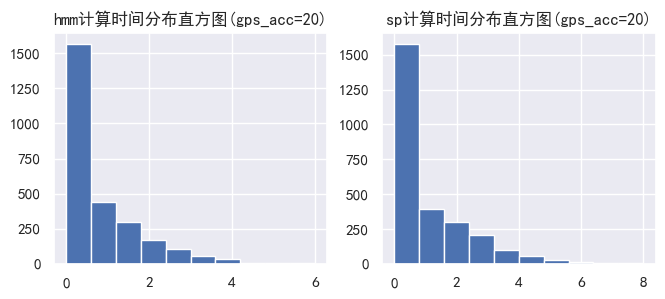

In [32]:
f = plt.figure(figsize=(12,3))                            #确定画布
sub1 = f.add_subplot(1,3,1)
sub1.set_title("hmm计算时间分布直方图(gps_acc=20)")
sub1.hist(hmm['time']-2,range=(0,6));
sub2 = f.add_subplot(1,3,2)
sub2.set_title("sp计算时间分布直方图(gps_acc=20)")
sub2.hist(sp['time'],range=(0,8));
sub3 = f.add_subplot(1,3,3)
sub3.set_title("          kp计算时间分布直方图(gps_acc=20,距离阈值=50,连续点=3)")
sub3.hist(kp['time'],range=(0,8));